In [1]:
import numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\MLProjects\Heart Disease Prediction\heart disease\heart.csv')

In [3]:
df.head()        #style.background_gradient(cmap= 'Purples_r')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.isnull().sum().sum()

0

In [5]:
df.describe().style.background_gradient()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.000000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.592510,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

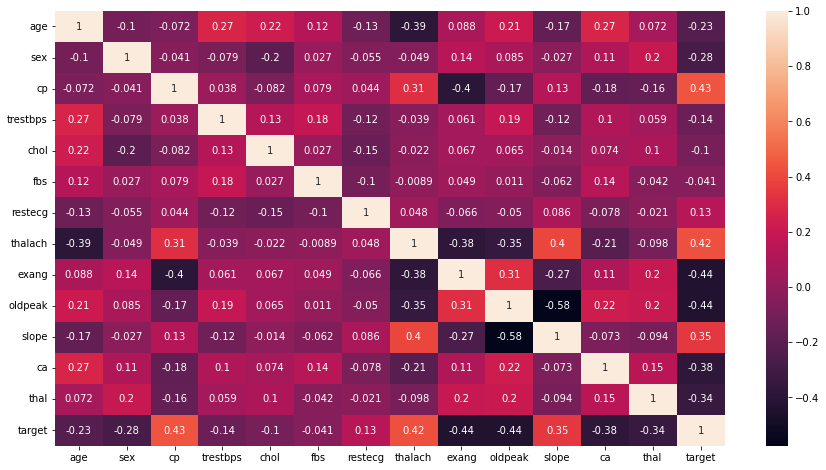

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='target', ylabel='count'>

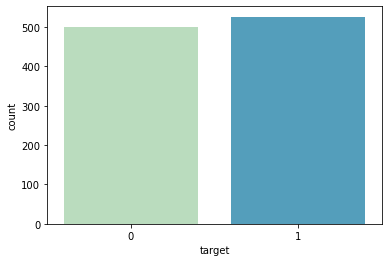

In [7]:
#sns.set_style('whitegrid')
sns.countplot(x='target', data=df,palette='GnBu')

# Feature Scaling

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
#scaling the necessary columns
columns = ['age','trestbps','chol','thalach','oldpeak']

In [10]:
df[columns] = scaler.fit_transform(df[columns])

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


In [12]:
X = df.drop('target',axis=1)
y= df.target

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8 ,shuffle=True,stratify=y, random_state=101, )

# Model Building

In [18]:
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.ensemble import  AdaBoostClassifier
from matplotlib import rcParams

In [15]:
adaboost= AdaBoostClassifier()
neighbor=KNeighborsClassifier()

In [27]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    neighbor = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(neighbor,X,y,cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

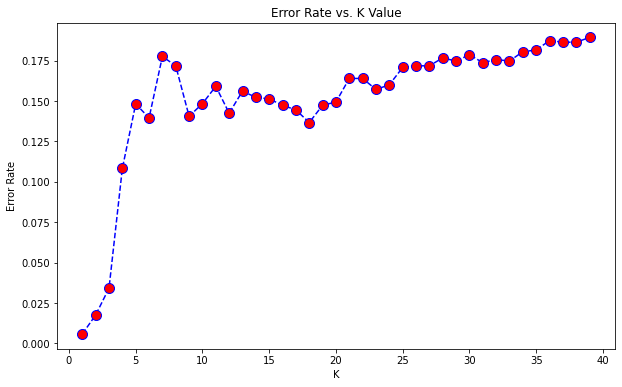

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
       markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [29]:
neighbor = KNeighborsClassifier(n_neighbors=18)

In [31]:
models = (neighbor,adaboost)

In [39]:
for  model in models:
    model.fit(X,y)
    score = cross_val_score(model,X,y,cv=10)
    score = score.mean()
    print(score)

0.8632781267846944
0.8936131734247098
